# Neural Network models

In [1]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from IPython.display import Image
from IPython.core.display import HTML
import seaborn as sns

%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import lars_path
import scipy.stats as stats
import re
import itertools
import string
import collections
from collections import Counter
from sklearn.metrics import accuracy_score, confusion_matrix, mean_absolute_error
from sklearn import preprocessing
from sklearn import (
    model_selection,
    feature_selection,
    ensemble,
    linear_model,
    metrics,
    decomposition,
)
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.losses import MeanAbsoluteError
from tensorflow.keras.utils import plot_model
from tensorflow.python.keras.callbacks import (
    ModelCheckpoint,
    ReduceLROnPlateau,
    EarlyStopping,
    TensorBoard,
)
from keras import models, layers, optimizers, regularizers

In [3]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


## Reading Data

In [4]:
x_train = pd.read_csv("/content/drive/MyDrive/x_train.csv", header=0).iloc[:, 1:]
x_test = pd.read_csv("/content/drive/MyDrive/x_test.csv", header=0).iloc[:, 1:]
y_train = pd.read_csv("/content/drive/MyDrive/y_train.csv", header=0).iloc[:, 1:]
y_test = pd.read_csv("/content/drive/MyDrive/y_test.csv", header=0).iloc[:, 1:]

## Callbacks

In [5]:
monitor = "val_loss"

model_fname = "model.h5"

callbacks = [
    # Stop training when a monitored quantity has stopped improving.
    EarlyStopping(monitor=monitor, patience=5, verbose=1, restore_best_weights=True),
    # Save the model after every epoch of the monitor quantity improves
    ModelCheckpoint(
        filepath=model_fname,
        monitor=monitor,
        save_best_only=True,
        save_weights_only=False,
        verbose=1,
    ),
    # Reduce learning rate when a metric has stopped improving
    ReduceLROnPlateau(
        monitor=monitor, factor=0.1, patience=3, verbose=1, restore_best_weights=True
    ),
]

In [6]:
def plot_keras_history(history):
    """

    :param history:
    :return:
    """
    # the history object gives the metrics keys.
    # we will store the metrics keys that are from the training sesion.
    metrics_names = [
        key for key in history.history.keys() if not key.startswith("val_")
    ]

    for i, metric in enumerate(metrics_names):

        # getting the training values
        metric_train_values = history.history.get(metric, [])

        # getting the validation values
        metric_val_values = history.history.get("val_{}".format(metric), [])

        # As loss always exists as a metric we use it to find the
        epochs = range(1, len(metric_train_values) + 1)

        # leaving extra spaces to allign with the validation text
        training_text = "   Training {}: {:.5f}".format(metric, metric_train_values[-1])

        # metric
        plt.figure(i, figsize=(12, 6))

        plt.plot(epochs, metric_train_values, "b", label=training_text)

        # if we validation metric exists, then plot that as well
        if metric_val_values:
            validation_text = "Validation {}: {:.5f}".format(
                metric, metric_val_values[-1]
            )

            plt.plot(epochs, metric_val_values, "g", label=validation_text)

        # add title, xlabel, ylabe, and legend
        plt.title("Model Metric: {}".format(metric))
        plt.xlabel("Epochs")
        plt.ylabel(metric.title())
        plt.legend()

    plt.show()

## Scaling Data

In [7]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

#First Model

In [8]:
hidden_units1 = 32
hidden_units2 = 32
hidden_units3 = 64
learning_rate = 0.01
# Creating model using the Sequential in tensorflow
def build_model_using_sequential():
    model1 = Sequential(
        [
            Dense(hidden_units1, kernel_initializer="normal", activation="relu"),
            Dropout(0.2),
            Dense(hidden_units2, kernel_initializer="normal", activation="relu"),
            Dropout(0.2),
            Dense(hidden_units3, kernel_initializer="normal", activation="relu"),
            Dense(1, kernel_initializer="normal", activation="linear"),
        ]
    )
    return model1


# build the model
model1 = build_model_using_sequential()

In [9]:
# loss function
model1.compile(
    loss="mean_squared_error",
    optimizer=Adam(learning_rate=learning_rate),
    metrics=["mae"],
)
# train the model
history = model1.fit(
    x_train,
    y_train,
    epochs=100,
    batch_size=50,
    validation_split=0.25,
    callbacks=callbacks,
)

Epoch 1/100
107/108 [============================>.] - ETA: 0s - loss: 1.9659 - mae: 0.9718
Epoch 00001: val_loss improved from inf to 0.28891, saving model to model.h5
108/108 [==============================] - 3s 5ms/step - loss: 1.9550 - mae: 0.9684 - val_loss: 0.2889 - val_mae: 0.3732 - lr: 0.0100
Epoch 2/100
 96/108 [=========================>....] - ETA: 0s - loss: 0.4443 - mae: 0.4819
Epoch 00002: val_loss did not improve from 0.28891
108/108 [==============================] - 0s 3ms/step - loss: 0.4385 - mae: 0.4781 - val_loss: 0.3485 - val_mae: 0.4189 - lr: 0.0100
Epoch 3/100
 95/108 [=========================>....] - ETA: 0s - loss: 0.3770 - mae: 0.4342
Epoch 00003: val_loss improved from 0.28891 to 0.27701, saving model to model.h5
108/108 [==============================] - 0s 4ms/step - loss: 0.3657 - mae: 0.4290 - val_loss: 0.2770 - val_mae: 0.3716 - lr: 0.0100
Epoch 4/100
 93/108 [========================>.....] - ETA: 0s - loss: 0.3850 - mae: 0.4230
Epoch 00004: val_loss

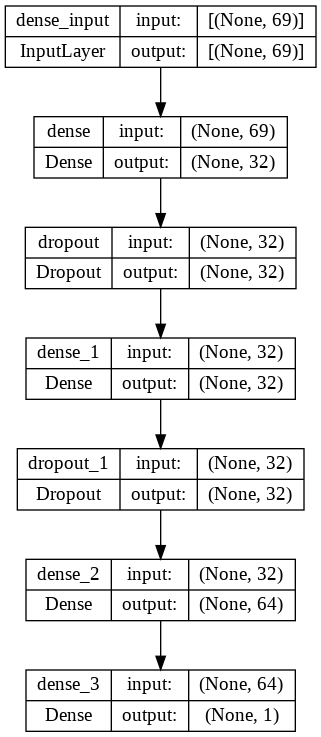

In [10]:
plot_model(model1, show_shapes=True)

In [11]:
pred1 = model1.predict(x_test)

57/57 [==============================] - 0s 2ms/step


In [12]:
list_pred1 = [x[0] for x in pred1.tolist()]

In [13]:
list_y1 = [x[0] for x in y_test.values.tolist()]

## Function to compute the mean absolute error of price

In [14]:
def mae(y, yhat):
    sum = 0
    for i in range(len(y)):
        sum += np.abs(2.7183 ** y[i] - 2.7183 ** yhat[i])
    r = sum / len(y)
    return r

## Function to compute the mean absolute percentage error of log price

In [15]:
def mape(y, yhat):
    MAPE = 0
    for i in range(len(y)):
        MAPE += np.abs(2.7183 ** y[i] - 2.7183 ** yhat[i]) / 2.7183 ** y[i]

    v = 100 * MAPE / len(y)
    return v

###MAE:

In [16]:
mae(list_y1, list_pred1)

27.19350620518628

###MAPE

In [17]:
mape(list_y1, list_pred1)

34.82534862030621

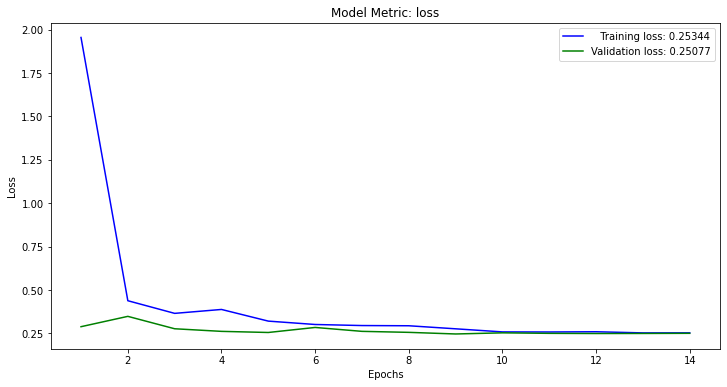

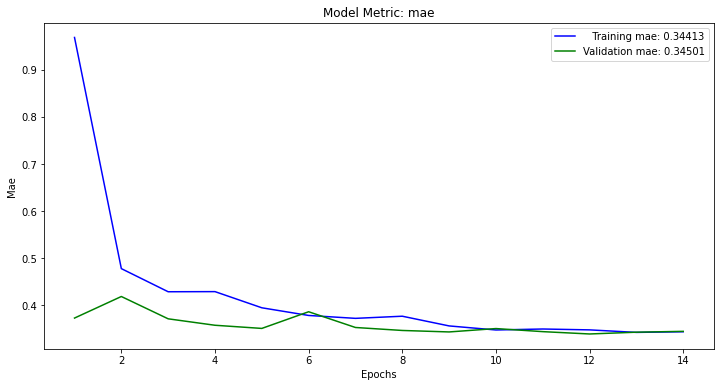

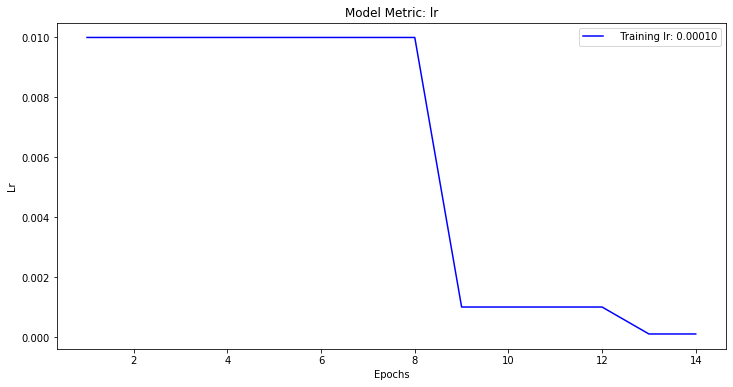

In [18]:
plot_keras_history(history)

# Second Model

In [19]:
# Building the model
model2 = models.Sequential()
model2.add(
    layers.Dense(
        32,
        input_shape=(x_train.shape[1],),
        kernel_regularizer=regularizers.l1(0.005),
        activation="relu",
    )
)
model2.add(
    layers.Dense(32, kernel_regularizer=regularizers.l1(0.005), activation="relu")
)
model2.add(
    layers.Dense(64, kernel_regularizer=regularizers.l1(0.005), activation="relu")
)
model2.add(
    layers.Dense(128, kernel_regularizer=regularizers.l1(0.005), activation="relu")
)
model2.add(layers.Dense(1, activation="linear"))

# Compiling the model
model2.compile(
    loss="mean_squared_error", optimizer="adam", metrics=["mean_squared_error"]
)

# Model summary
print(model2.summary())
model2_history = model2.fit(
    x_train,
    y_train,
    epochs=100,
    batch_size=256,
    validation_split=0.25,
    callbacks=callbacks,
)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                2240      
                                                                 
 dense_5 (Dense)             (None, 32)                1056      
                                                                 
 dense_6 (Dense)             (None, 64)                2112      
                                                                 
 dense_7 (Dense)             (None, 128)               8320      
                                                                 
 dense_8 (Dense)             (None, 1)                 129       
                                                                 
Total params: 13,857
Trainable params: 13,857
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
17/22 [======================>...

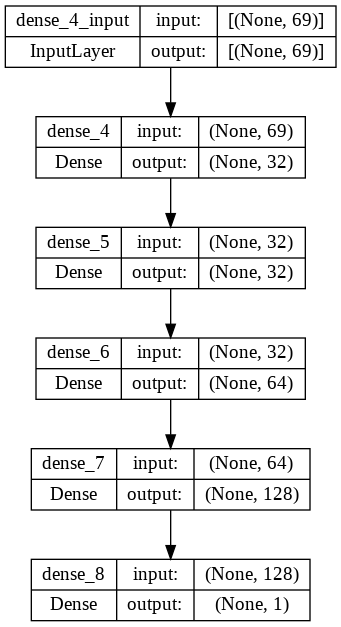

In [20]:
plot_model(model2, show_shapes=True)

In [21]:
pred2 = model2.predict(x_test)

57/57 [==============================] - 0s 1ms/step


In [22]:
list_pred2 = [x[0] for x in pred2.tolist()]

###MAE:

In [23]:
mae(list_y1, list_pred2)

27.2671133551236

###MAPE:

In [24]:
mape(list_y1, list_pred2)

34.841713634407185

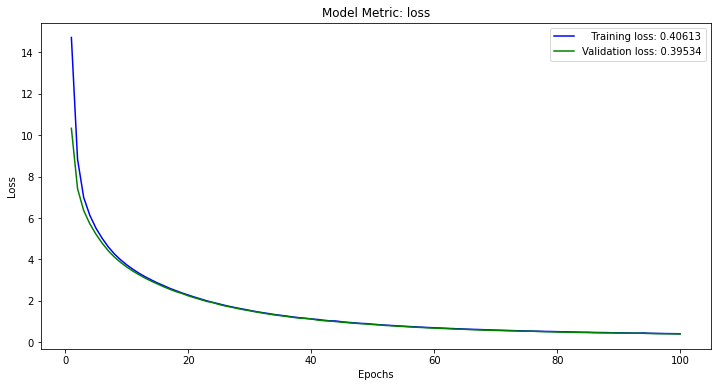

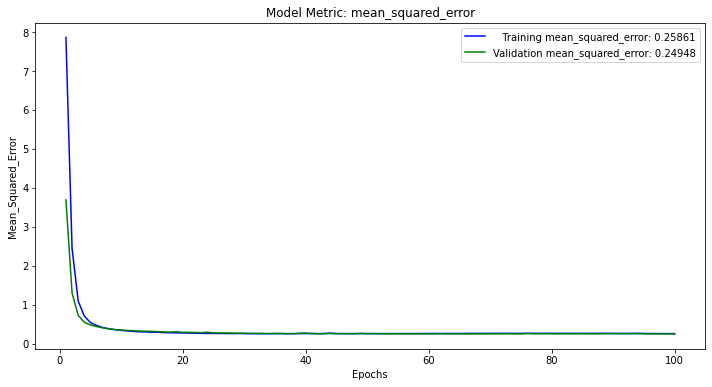

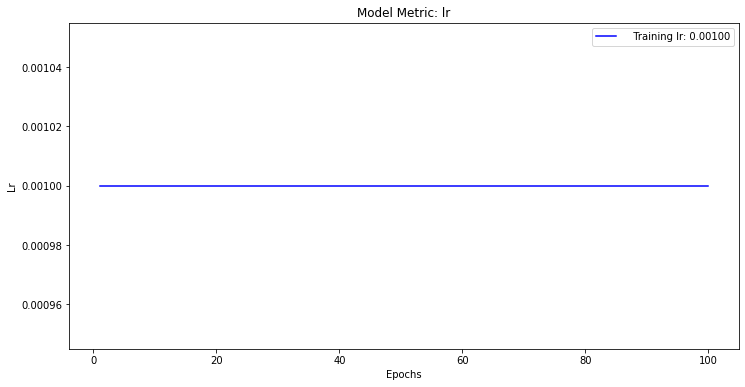

In [25]:
plot_keras_history(model2_history)

# Third Model

In [26]:
# Setting model hyperparameters
batch_size = (
    64  # batch=64 =>  in each iteration, we consider 64 training examples at once
)
num_epochs = 100

In [27]:
# Building the model
model3 = Sequential()
model3.add(Dense(128, input_shape=(x_train.shape[1],), activation="relu"))
model3.add(Dense(256, activation="relu"))
model3.add(Dense(256, activation="relu"))
model3.add(Dense(1, activation="linear"))

# Compiling the model
model3.compile(
    loss="mean_squared_error", optimizer="adam", metrics=["mean_absolute_error"]
)

# Model summary
print(model3.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 128)               8960      
                                                                 
 dense_10 (Dense)            (None, 256)               33024     
                                                                 
 dense_11 (Dense)            (None, 256)               65792     
                                                                 
 dense_12 (Dense)            (None, 1)                 257       
                                                                 
Total params: 108,033
Trainable params: 108,033
Non-trainable params: 0
_________________________________________________________________
None


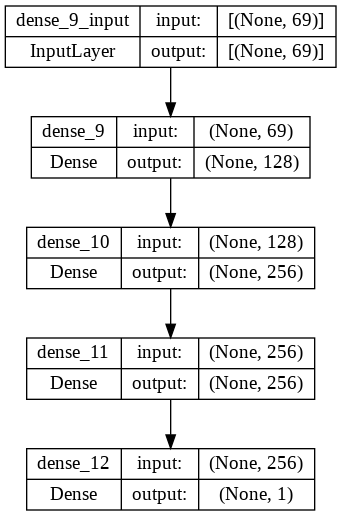

In [28]:
plot_model(model3, show_shapes=True)

In [29]:
model3_history = model3.fit(
    x=x_train,  # features (as dense inputs)
    y=y_train,  # labels
    batch_size=batch_size,  # define batch size
    epochs=num_epochs,  # number of epochs
    verbose=2,  # the most extended verbosity level
    validation_split=0.25,
    callbacks=callbacks,
)

Epoch 1/100

Epoch 00001: val_loss did not improve from 0.24697
85/85 - 1s - loss: 2.0282 - mean_absolute_error: 0.8820 - val_loss: 0.5307 - val_mean_absolute_error: 0.4339 - lr: 0.0010 - 839ms/epoch - 10ms/step
Epoch 2/100

Epoch 00002: val_loss did not improve from 0.24697
85/85 - 0s - loss: 0.3509 - mean_absolute_error: 0.4114 - val_loss: 0.4640 - val_mean_absolute_error: 0.4067 - lr: 0.0010 - 299ms/epoch - 4ms/step
Epoch 3/100

Epoch 00003: val_loss did not improve from 0.24697
85/85 - 0s - loss: 0.2846 - mean_absolute_error: 0.3723 - val_loss: 0.4437 - val_mean_absolute_error: 0.3856 - lr: 0.0010 - 297ms/epoch - 3ms/step
Epoch 4/100

Epoch 00004: val_loss did not improve from 0.24697
85/85 - 0s - loss: 0.2507 - mean_absolute_error: 0.3503 - val_loss: 0.4342 - val_mean_absolute_error: 0.3776 - lr: 0.0010 - 319ms/epoch - 4ms/step
Epoch 5/100

Epoch 00005: val_loss did not improve from 0.24697
85/85 - 0s - loss: 0.2387 - mean_absolute_error: 0.3425 - val_loss: 0.4199 - val_mean_absol

In [30]:
pred3 = model3.predict(x_test)

57/57 [==============================] - 0s 2ms/step


In [31]:
list_pred3 = [x[0] for x in pred3.tolist()]

###MAE:

In [32]:
mae(list_y1, list_pred3)

29.23676418447039

###MAPE:

In [33]:
mape(list_y1, list_pred3)

38.70684675884088

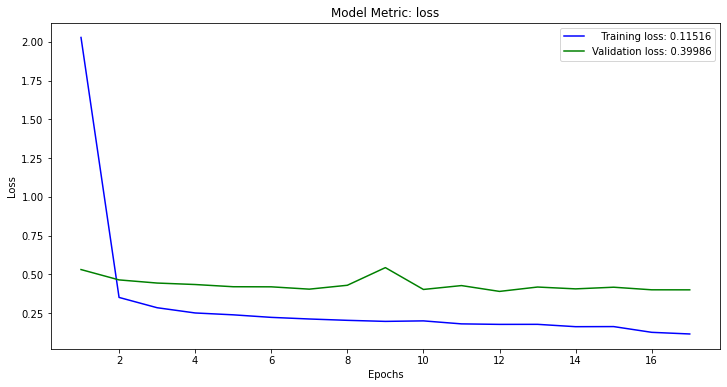

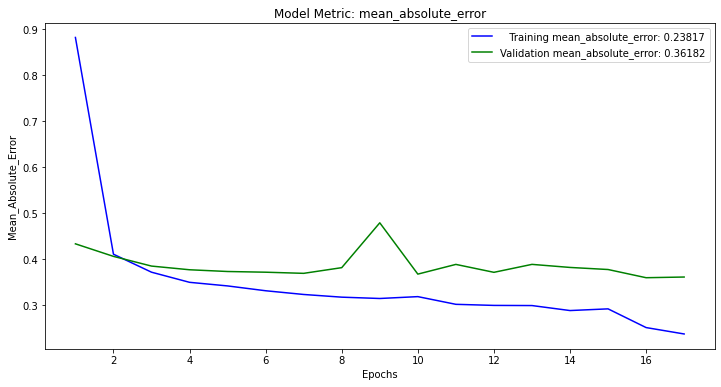

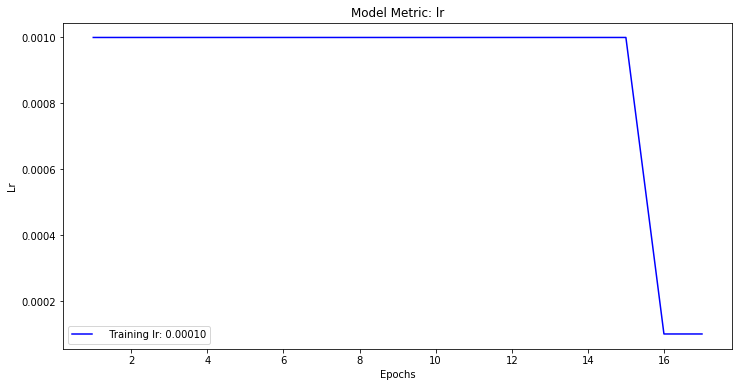

In [34]:
plot_keras_history(model3_history)

# Fourth model

In [35]:
def findparams(x_train, y_train, x_test, y_test):

    # Defining the list of hyper parameters to try
    batch_size_list = [30, 50, 100, 250]
    epoch_list = [10, 50, 100]

    import pandas as pd

    SearchResultsData = pd.DataFrame(columns=["TrialNumber", "Parameters", "Accuracy"])

    # initializing the trials
    TrialNumber = 0
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber += 1
            # create ANN model
            model = Sequential()
            # Defining the first layer of the model
            model.add(
                Dense(
                    units=5,
                    input_dim=x_train.shape[1],
                    kernel_initializer="normal",
                    activation="relu",
                )
            )

            # Defining the Second layer of the model
            model.add(Dense(units=5, kernel_initializer="normal", activation="relu"))

            # The output neuron is a single fully connected node
            # Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer="normal", activation="linear"))

            # Compiling the model
            model.compile(loss="mean_squared_error", optimizer="adam")

            # Fitting the ANN to the Training set
            model.fit(
                x_train,
                y_train,
                batch_size=batch_size_trial,
                epochs=epochs_trial,
                verbose=2,
            )

            MAPE = np.mean(100 * (np.abs(y_test - model.predict(x_test)) / y_test))

            # printing the results of the current iteration
            print(
                TrialNumber,
                "Parameters:",
                "batch_size:",
                batch_size_trial,
                "-",
                "epochs:",
                epochs_trial,
                "Accuracy:",
                100 - MAPE,
            )

            SearchResultsData = SearchResultsData.append(
                pd.DataFrame(
                    data=[
                        [
                            TrialNumber,
                            str(batch_size_trial) + "-" + str(epochs_trial),
                            100 - MAPE,
                        ]
                    ],
                    columns=["TrialNumber", "Parameters", "Accuracy"],
                )
            )
    return SearchResultsData


# Calling the function
results = findparams(x_train, y_train, x_test, y_test)

Epoch 1/10
240/240 - 1s - loss: 9.4919 - 808ms/epoch - 3ms/step
Epoch 2/10
240/240 - 0s - loss: 0.8872 - 479ms/epoch - 2ms/step
Epoch 3/10
240/240 - 0s - loss: 0.5289 - 480ms/epoch - 2ms/step
Epoch 4/10
240/240 - 0s - loss: 0.4074 - 478ms/epoch - 2ms/step
Epoch 5/10
240/240 - 0s - loss: 0.3584 - 476ms/epoch - 2ms/step
Epoch 6/10
240/240 - 0s - loss: 0.3327 - 472ms/epoch - 2ms/step
Epoch 7/10
240/240 - 1s - loss: 0.3188 - 623ms/epoch - 3ms/step
Epoch 8/10
240/240 - 1s - loss: 0.3112 - 681ms/epoch - 3ms/step
Epoch 9/10
240/240 - 1s - loss: 0.3062 - 665ms/epoch - 3ms/step
Epoch 10/10
240/240 - 1s - loss: 0.3018 - 539ms/epoch - 2ms/step
57/57 [==============================] - 0s 1ms/step
1 Parameters: batch_size: 30 - epochs: 10 Accuracy: log_price    90.382972
dtype: float64
Epoch 1/50
240/240 - 1s - loss: 10.6644 - 861ms/epoch - 4ms/step
Epoch 2/50
240/240 - 0s - loss: 0.7601 - 475ms/epoch - 2ms/step
Epoch 3/50
240/240 - 0s - loss: 0.4521 - 468ms/epoch - 2ms/step
Epoch 4/50
240/240 - 0s

In [36]:
# Batch size 30 and number of epochs 50 gives the most accurate prediction
results

,TrialNumber,Parameters,Accuracy
0,1,30-10,log_price 90.382972 dtype: float64
0,2,30-50,log_price 91.345766 dtype: float64
0,3,30-100,log_price 91.449003 dtype: float64
0,4,50-10,log_price 90.565094 dtype: float64
0,5,50-50,log_price 91.456275 dtype: float64
0,6,50-100,log_price 91.466252 dtype: float64
0,7,100-10,log_price 88.323459 dtype: float64
0,8,100-50,log_price 90.835255 dtype: float64
0,9,100-100,log_price 91.150084 dtype: float64
0,10,250-10,log_price 80.559339 dtype: float64


In [37]:
# create ANN model
model = Sequential()
# Defining the first layer of the model
model.add(
    Dense(
        units=5,
        input_dim=x_train.shape[1],
        kernel_initializer="normal",
        activation="relu",
    )
)
# Defining the Second layer of the model
model.add(Dense(units=5, kernel_initializer="normal", activation="relu"))

# The output neuron is a single fully connected node
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer="normal", activation="linear"))
# Compiling the model
model.compile(loss="mean_squared_error", optimizer="adam")

# Fitting the ANN to the Training set
model.fit(x_train, y_train, batch_size=30, epochs=50, verbose=2)

# Generating Predictions on testing data
Pred4 = model.predict(x_test)

Epoch 1/50
240/240 - 1s - loss: 10.4802 - 798ms/epoch - 3ms/step
Epoch 2/50
240/240 - 0s - loss: 0.8582 - 459ms/epoch - 2ms/step
Epoch 3/50
240/240 - 0s - loss: 0.5001 - 454ms/epoch - 2ms/step
Epoch 4/50
240/240 - 0s - loss: 0.4131 - 453ms/epoch - 2ms/step
Epoch 5/50
240/240 - 0s - loss: 0.3698 - 488ms/epoch - 2ms/step
Epoch 6/50
240/240 - 1s - loss: 0.3441 - 501ms/epoch - 2ms/step
Epoch 7/50
240/240 - 0s - loss: 0.3281 - 482ms/epoch - 2ms/step
Epoch 8/50
240/240 - 0s - loss: 0.3178 - 467ms/epoch - 2ms/step
Epoch 9/50
240/240 - 0s - loss: 0.3123 - 459ms/epoch - 2ms/step
Epoch 10/50
240/240 - 0s - loss: 0.3105 - 463ms/epoch - 2ms/step
Epoch 11/50
240/240 - 0s - loss: 0.3067 - 451ms/epoch - 2ms/step
Epoch 12/50
240/240 - 0s - loss: 0.3039 - 476ms/epoch - 2ms/step
Epoch 13/50
240/240 - 0s - loss: 0.3022 - 456ms/epoch - 2ms/step
Epoch 14/50
240/240 - 0s - loss: 0.3003 - 450ms/epoch - 2ms/step
Epoch 15/50
240/240 - 0s - loss: 0.2978 - 445ms/epoch - 2ms/step
Epoch 16/50
240/240 - 0s - loss: 

In [38]:
list_pred4 = [x[0] for x in Pred4.tolist()]

### MAE :

In [39]:
mae(list_y1, list_pred4)

28.952035503944785

###MAPE

In [40]:
mape(list_y1, list_pred4)

40.8205249988539